In [4]:
os.getcwd()

'/home/hina0830/Research/CRESST/Cloudy'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os

# Changes directory to access the Python packages
os.chdir('/home/hina0830/Research/CRESST/Cloudy/packages')

import Continuum_keV as cont
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%load_ext autoreload
%autoreload 2 

file = open('AGN_0726' + '/' + 'AGN_xi2' + '_out_ang.txt' )
file.readline()
Cont_nu, incident, trans, DiffOut, net_trans, reflec, total, reflin, outlin, lineID, cont, nLine = np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([])
for line in file:
    line = line.rstrip('\n')
    line = line.split('\t')
    Cont_nu = np.append(Cont_nu, float(line[0]))
    trans = np.append(trans, float(line[1]))

In [6]:
os.chdir('/home/hina0830/Research/CRESST/Cloudy')

In [7]:
# Defines the names of 3 files to be read and their location
path = 'AGN_0726'
name1 = 'AGN_n6'
name2 = 'AGN_n12'
name3 = 'AGN_n14'

In [8]:
# Reads the files and extract wavelength in Angstrom and the transmittance (unitless)
energy1, trans1 = cont.trans(path, name1)
energy2, trans2 = cont.trans(path, name2)
energy3, trans3 = cont.trans(path, name3)

(1.0, 20.0)

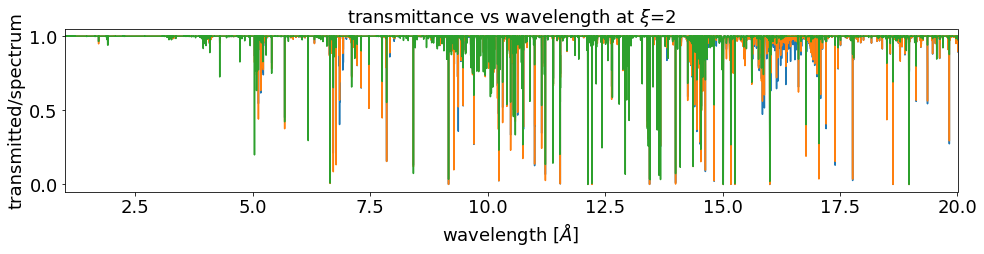

In [14]:
# Plots the absorption feature (transmittance vs wavelength)
# from 1~20 angstroms at fixed ionization parameter xi=2
# for 3 simulation results

fig, ax = plt.subplots(figsize=(16,3))
plt.title('transmittance vs wavelength at $\\xi$=2', fontsize=18) 
plt.xlabel('wavelength [$\AA$]', fontsize=18)
plt.ylabel('transmitted/spectrum', fontsize=18)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18)

plt.plot(energy1, trans1)
plt.plot(energy2, trans2)
plt.plot(energy3, trans3)
plt.xlim(1, 20)

/tmp/ipykernel_2042/2361324336.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(16,3))


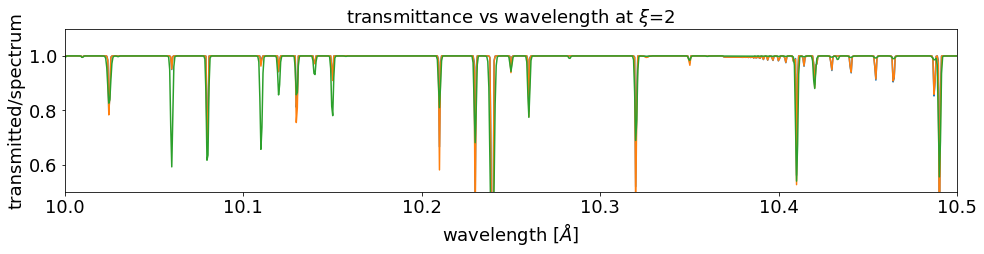

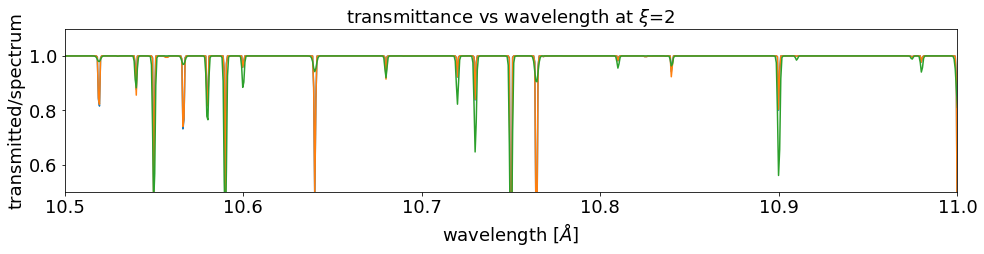

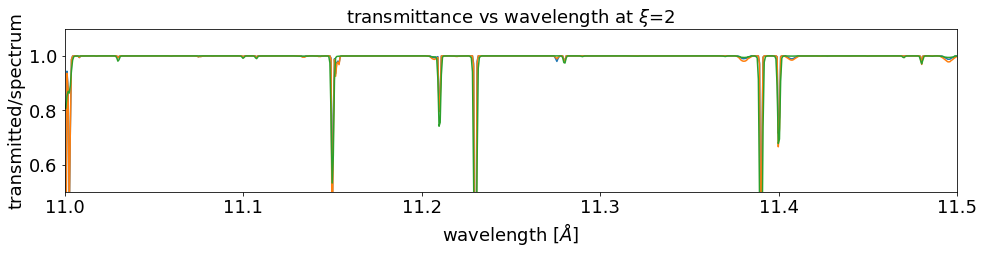

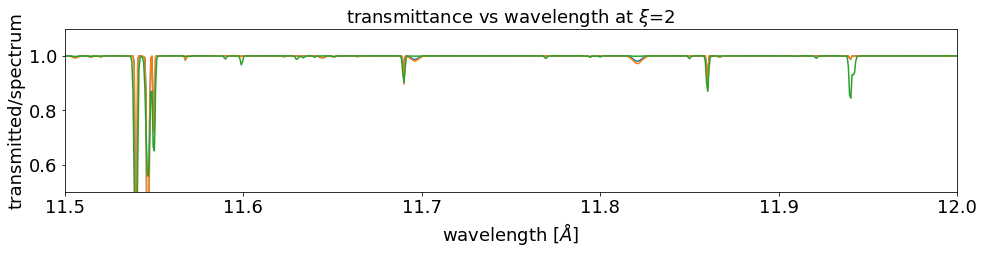

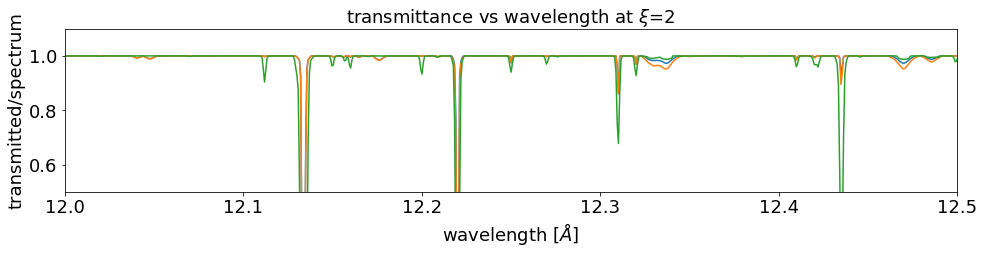

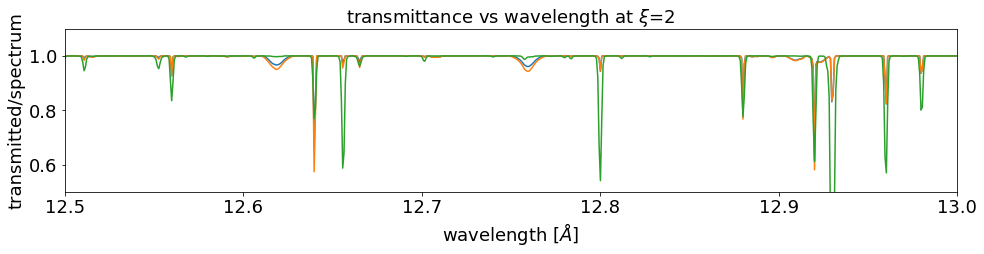

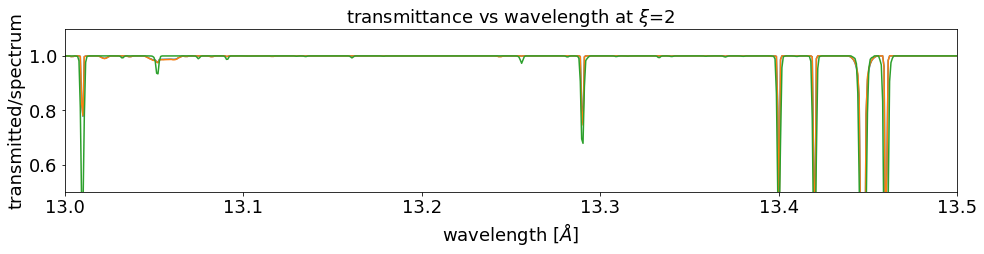

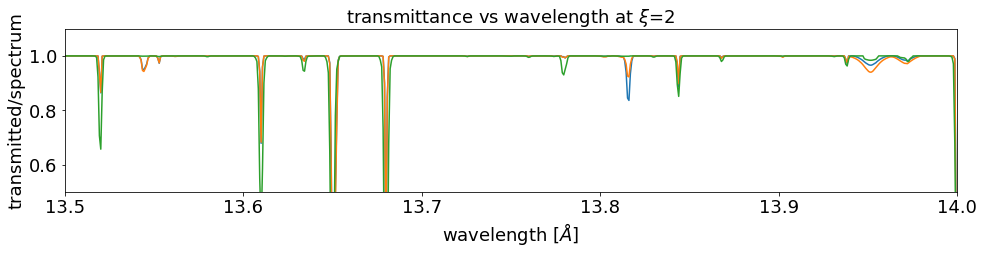

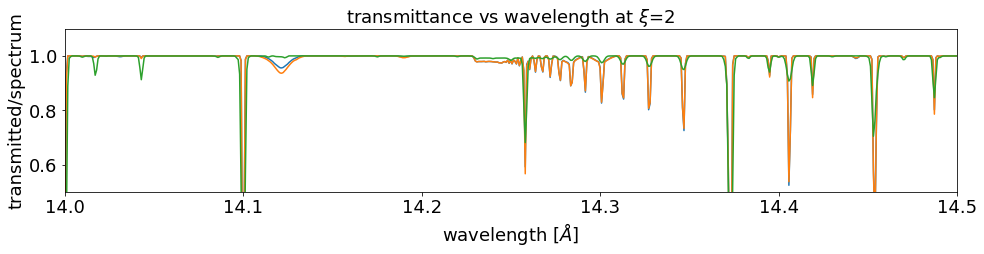

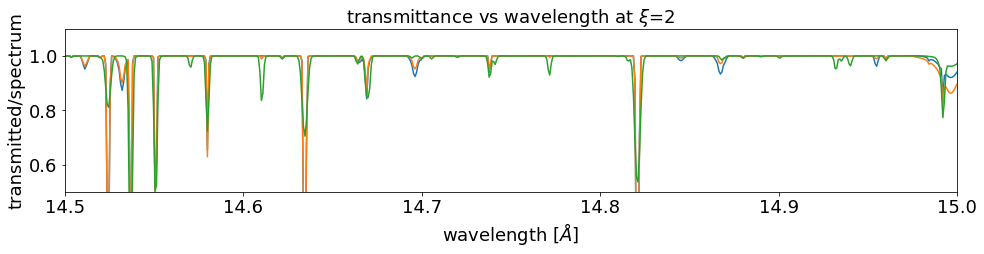

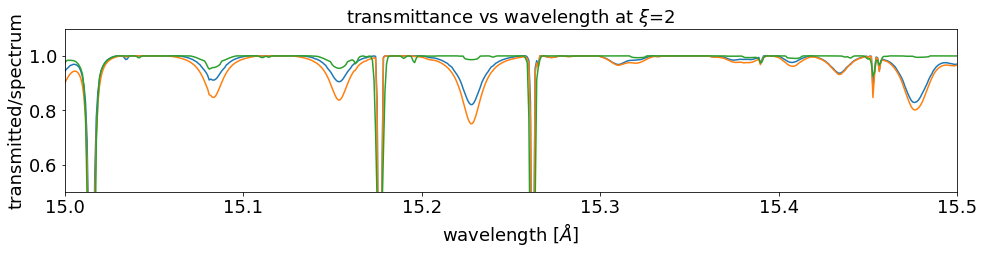

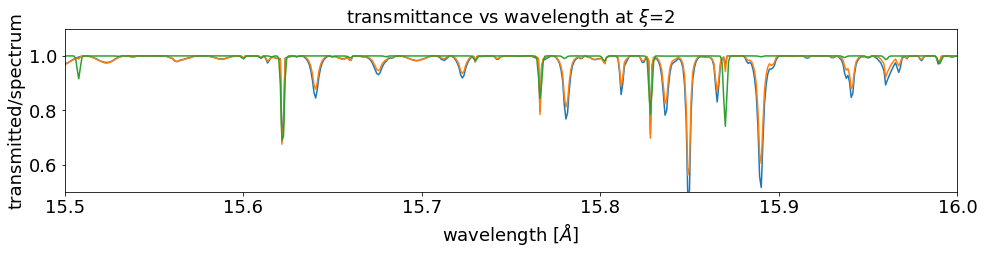

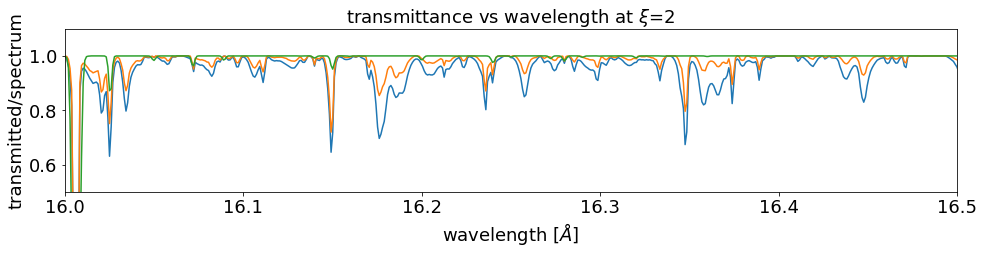

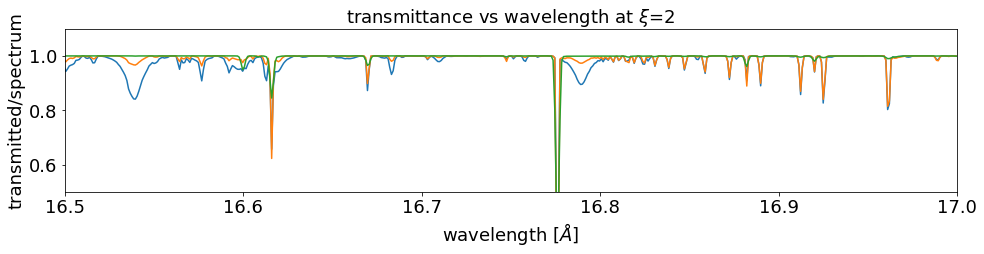

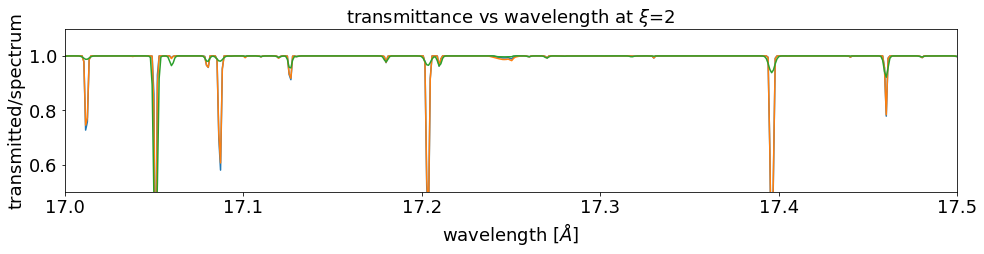

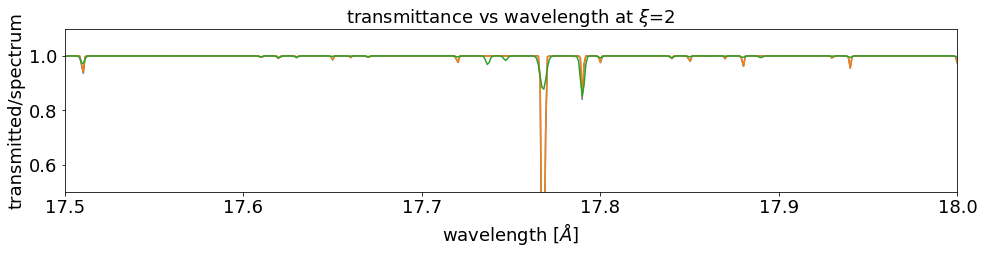

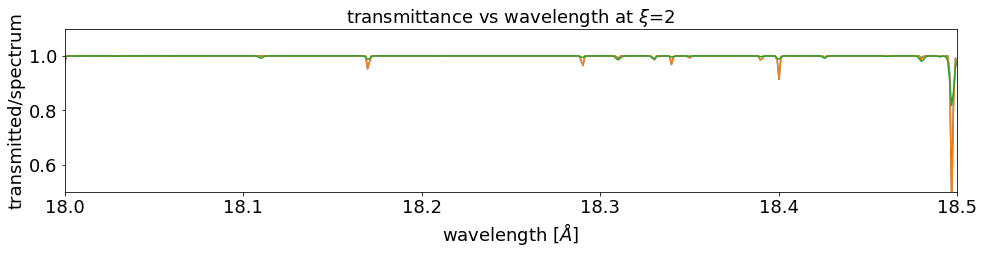

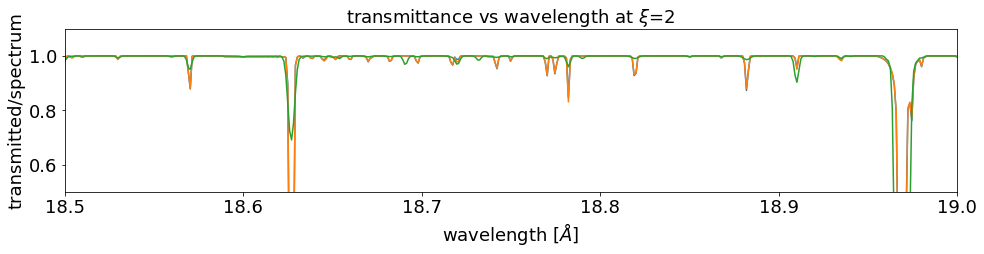

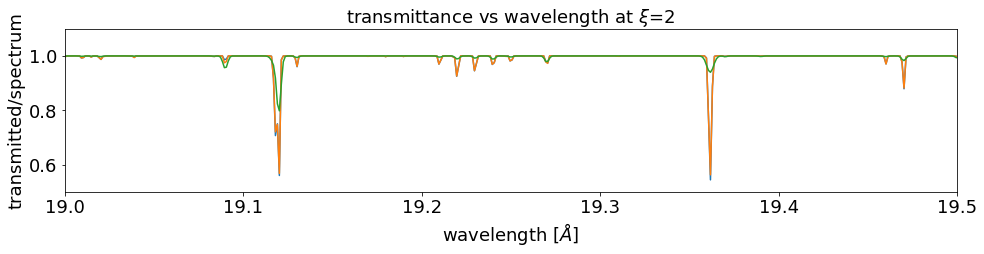

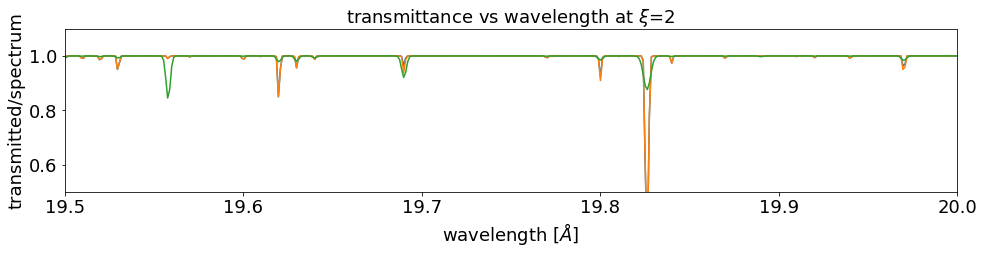

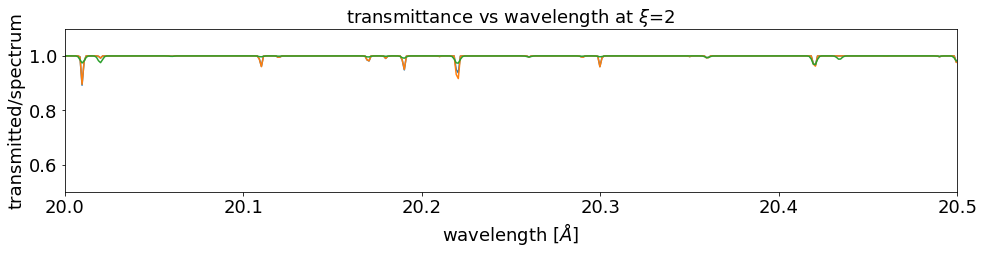

In [15]:
# Creates more zoomed-in absorption feature (transmittance vs wavelength)
# plots to to compare the values in y-axis of 3 simulation results
# at fixed ionization parameter xi=2

# Each plot is 0.5 angstrom width in 10~20 angstrom interval
i = 10
while i <= 20 :
    fig, ax = plt.subplots(figsize=(16,3))
    plt.title('transmittance vs wavelength at $\\xi$=2', fontsize=18)
    plt.xlabel('wavelength [$\AA$]', fontsize=18)
    plt.ylabel('transmitted/spectrum', fontsize=18)
    ax.tick_params(axis='x', labelsize= 18) 
    ax.tick_params(axis='y', labelsize= 18)
    
    plt.plot(energy1, trans1)
    plt.plot(energy2, trans2)
    plt.plot(energy3, trans3)

    plt.xlim(i, i+0.5)
    plt.ylim(0.5, 1.1)
    i += .5

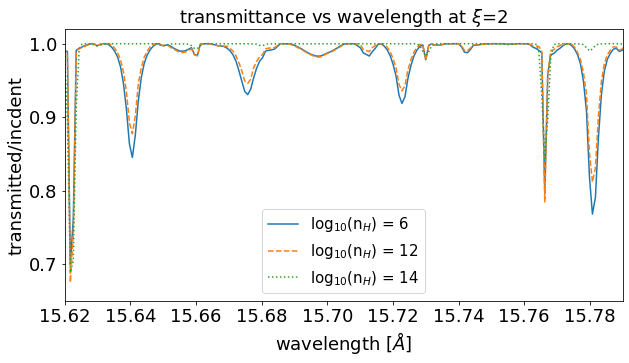

In [17]:
# Diplays the finalized plot with the best interval of interest
# based on all the plots created above;
# I decided that 15.62~15.79 angstrom window best represents
# the characteristics of transmittance for 3 simulation results;

# I am using different colors and linestyles for 3 data sets.
# We can see that more photons are absorbed at lower number density
# and more photons are transmitted at higher number density
fig, ax = plt.subplots(figsize=(10,5))
plt.title('transmittance vs wavelength at $\\xi$=2', fontsize=18)
plt.xlabel('wavelength [$\AA$]', fontsize=18)
plt.ylabel('transmitted/incdent', fontsize=18)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18)

plt.plot(energy1, trans1, label=r'log$_{10}$(n$_H$) = 6')
plt.plot(energy2, trans2, linestyle='--', label=r'log$_{10}$(n$_H$) = 12')
plt.plot(energy3, trans3, linestyle=':', label=r'log$_{10}$(n$_H$) = 14')

plt.xlim(15.62, 15.79)
plt.ylim(0.65, 1.02)
plt.legend(fontsize=15)